Original Size: 4150.93 KB
Compressed Size: 898.51 KB
Compression Ratio: 21.65%
Original Size: 4150.93 KB
Compressed Size: 6322.14 KB
Compression Ratio: 152.31%


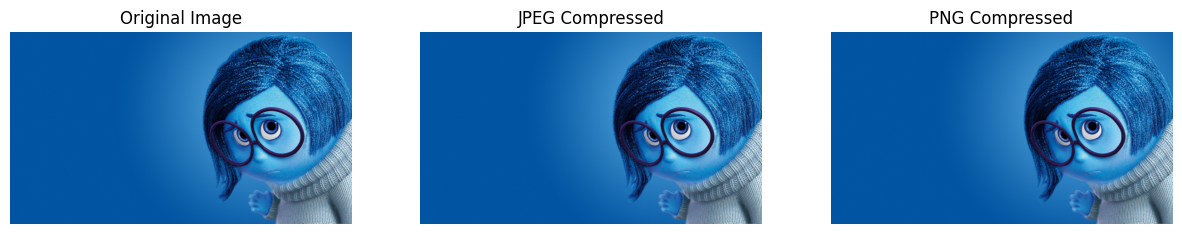

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

def compress_image_jpeg(input_path, quality=50):
    """Compress image using lossy JPEG compression"""
    image = cv2.imread(input_path)
    output_path = "compressed_image.jpg"
    cv2.imwrite(output_path, image, [cv2.IMWRITE_JPEG_QUALITY, quality])
    return output_path

def compress_image_png(input_path, compression_level=9):
    """Compress image using lossless PNG compression"""
    image = Image.open(input_path)
    output_path = "compressed_image.png"
    image.save(output_path, "PNG", compress_level=compression_level)
    return output_path

def compare_file_sizes(original, compressed):
    """Compare file sizes before and after compression"""
    original_size = os.path.getsize(original) / 1024  # Convert to KB
    compressed_size = os.path.getsize(compressed) / 1024  # Convert to KB
    print(f"Original Size: {original_size:.2f} KB")
    print(f"Compressed Size: {compressed_size:.2f} KB")
    print(f"Compression Ratio: {(compressed_size / original_size) * 100:.2f}%")

def display_images(original, jpeg_compressed, png_compressed):
    """Display the original and compressed images"""
    orig_img = Image.open(original)
    jpeg_img = Image.open(jpeg_compressed)
    png_img = Image.open(png_compressed)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(orig_img)
    axs[0].set_title("Original Image")
    axs[1].imshow(jpeg_img)
    axs[1].set_title("JPEG Compressed")
    axs[2].imshow(png_img)
    axs[2].set_title("PNG Compressed")

    for ax in axs:
        ax.axis("off")

    plt.show()

if __name__ == "__main__":
    input_image = "/content/sadness.jpg"

    jpeg_compressed_path = compress_image_jpeg(input_image, quality=90)
    png_compressed_path = compress_image_png(input_image, compression_level=9)

    compare_file_sizes(input_image, jpeg_compressed_path)
    compare_file_sizes(input_image, png_compressed_path)

    display_images(input_image, jpeg_compressed_path, png_compressed_path)


🚀 Training CNN on MNIST...

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 - 42s - 56ms/step - accuracy: 0.9185 - loss: 0.2666 - val_accuracy: 0.9809 - val_loss: 0.0633
Epoch 2/10
750/750 - 42s - 56ms/step - accuracy: 0.9730 - loss: 0.0922 - val_accuracy: 0.9870 - val_loss: 0.0466
Epoch 3/10
750/750 - 44s - 59ms/step - accuracy: 0.9805 - loss: 0.0665 - val_accuracy: 0.9883 - val_loss: 0.0422
Epoch 4/10
750/750 - 36s - 48ms/step - accuracy: 0.9840 - loss: 0.0548 - val_accuracy: 0.9874 - val_loss: 0.0403
Epoch 5/10
750/750 - 40s - 54ms/step - accuracy: 0.9864 - loss: 0.0458 - val_accuracy: 0.9893 - val_loss: 0.0356
Epoch 6/10
750/750 - 37s - 50ms/step - accuracy: 0.9874 - loss: 0.0399 - val_accuracy: 0.9898 - val_loss: 0.0328
Epoch 7/10
750/750 - 35s - 47ms/step - accuracy: 0.9894 - loss: 0.0333 - val_accuracy: 0.9912 - val_loss: 0.0325
Epoch 8/10
750/750 - 42s - 56ms/step - accuracy: 0.9907 - loss: 0.0306 - val_accuracy: 0.9908 - val_loss: 0.0348
Epoch 9/10
750/750 - 40s - 54ms/step - accuracy: 0.9918 - loss: 0.0262 - val_accuracy: 0.9912 - 

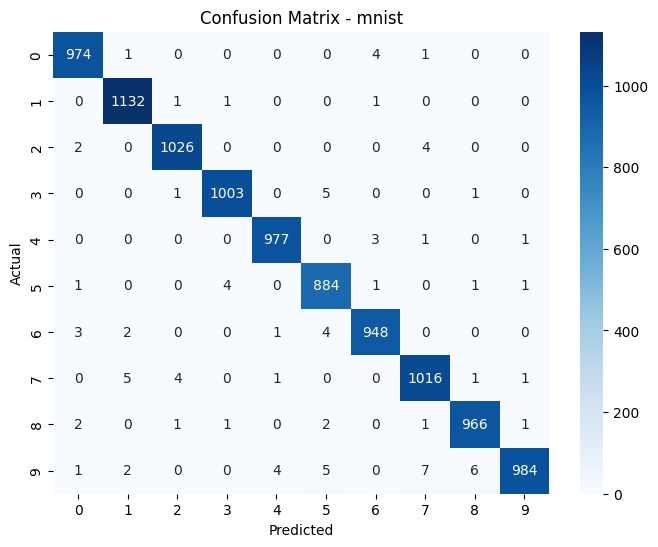

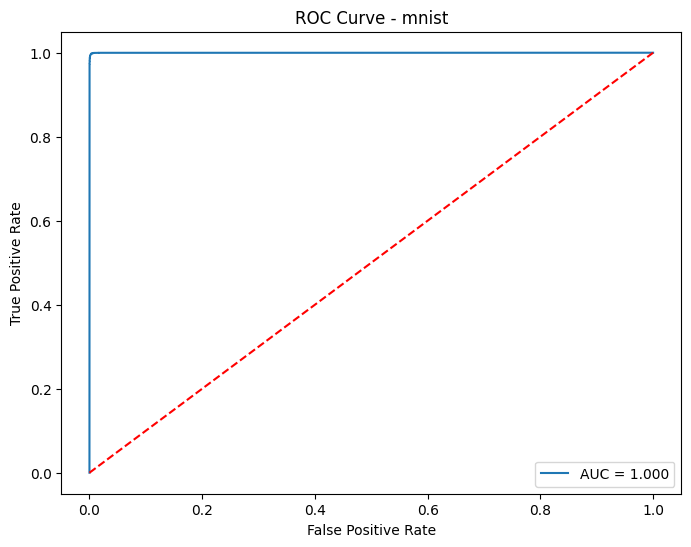

AUC Score: 1.000


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist, cifar10
from sklearn.model_selection import train_test_split

def load_data(dataset="mnist"):
    """Loads and preprocesses the MNIST or CIFAR-10 dataset."""
    if dataset == "mnist":
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        x_train = x_train.reshape(-1, 28, 28, 1)
        x_test = x_test.reshape(-1, 28, 28, 1)
        input_shape = (28, 28, 1)
        num_classes = 10
    elif dataset == "cifar10":
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        input_shape = (32, 32, 3)
        num_classes = 10
    else:
        raise ValueError("Dataset should be either 'mnist' or 'cifar10'")

    # Normalize pixel values to [0, 1]
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Convert labels to categorical (One-hot encoding)
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    # Split dataset into 80% train, 20% test
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    return x_train, x_val, y_train, y_val, x_test, y_test, input_shape, num_classes

def build_cnn_model(input_shape, num_classes):
    """Defines a simple CNN model."""
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_confusion_matrix(y_true, y_pred, dataset_name):
    """Plots the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.show()

def plot_roc_auc(y_true, y_probs, dataset_name):
    """Plots ROC curve and calculates AUC."""
    fpr, tpr, _ = roc_curve(y_true.ravel(), y_probs.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="red")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {dataset_name}")
    plt.legend()
    plt.show()
    print(f"AUC Score: {roc_auc:.3f}")

def evaluate_model(model, x_test, y_test, dataset_name):
    """Evaluates the model and prints performance metrics."""
    y_probs = model.predict(x_test)
    y_pred = np.argmax(y_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = np.mean(y_pred == y_true)
    print(f"\n🔹 Model Accuracy ({dataset_name}): {accuracy*100:.2f}%")

    report = classification_report(y_true, y_pred, digits=4)
    print("\nClassification Report:\n", report)

    plot_confusion_matrix(y_true, y_pred, dataset_name)
    plot_roc_auc(y_test, y_probs, dataset_name)

if __name__ == "__main__":
    # 🔹 Run CNN on MNIST
    print("\n🚀 Training CNN on MNIST...\n")
    x_train, x_val, y_train, y_val, x_test, y_test, input_shape, num_classes = load_data("mnist")
    mnist_model = build_cnn_model(input_shape, num_classes)
    mnist_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64, verbose=2)
    evaluate_model(mnist_model, x_test, y_test, "mnist")

    # 🔹 Run CNN on CIFAR-10
    # print("\n🚀 Training CNN on CIFAR-10...\n")
    # x_train, x_val, y_train, y_val, x_test, y_test, input_shape, num_classes = load_data("cifar10")
    # cifar_model = build_cnn_model(input_shape, num_classes)
    # cifar_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64, verbose=2)
    # evaluate_model(cifar_model, x_test, y_test, "cifar10")
